<a href="https://colab.research.google.com/github/rencdr/customer_segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
X=df.iloc[:, [3,4]].values

In [7]:
from sklearn.cluster import KMeans
wcss = []

In [12]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

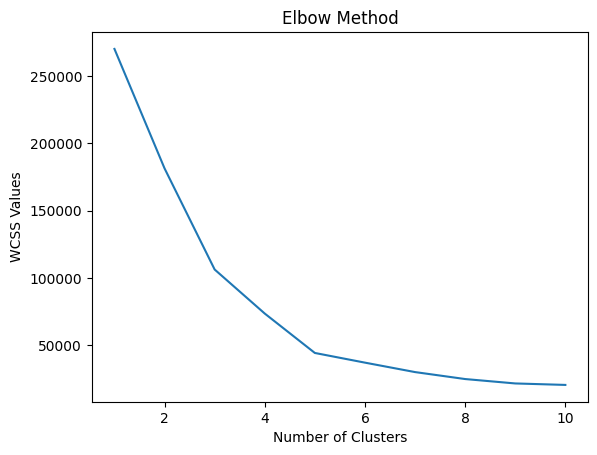

In [14]:
x = list(range(1, 11))
y = wcss[:len(x)]

plt.plot(x, y)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')
plt.show()

In [15]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [16]:
y_kmeans = kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


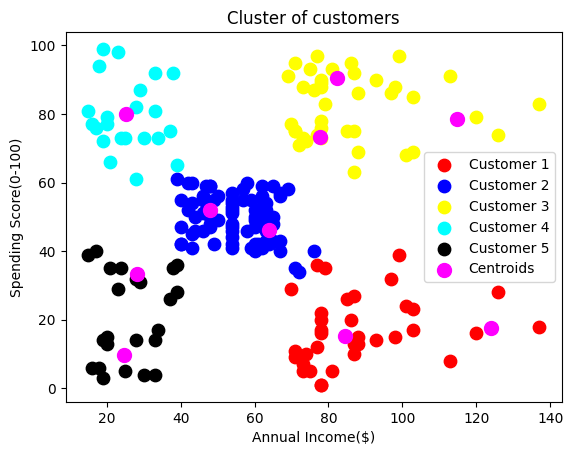

In [21]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=80, c="red", label='Customer 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=80, c="blue", label='Customer 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=80, c="yellow", label='Customer 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=80, c="cyan", label='Customer 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s=80, c="black", label='Customer 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="magenta", label='Centroids')
plt.title('Cluster of customers')
plt.xlabel('Annual Income($)')
plt.ylabel('Spending Score(0-100)')
plt.legend()
plt.show()